In [3]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import welch
import pandas as pd
import seaborn as sns
import mne_features
import warnings
warnings.filterwarnings('ignore')

adhd_len=[]
control_len=[]
path='./ADHD/'
for i in os.listdir(path):
    raw=mne.io.read_raw_fif(path+i,preload = True,verbose=False)
    adhd_len.append(raw._data.shape[1])
path='./Control/'
for i in os.listdir(path):
    raw=mne.io.read_raw_fif(path+i,preload = True,verbose=False)
    control_len.append(raw._data.shape[1])

In [4]:
adhd_tm_list=np.array(adhd_len)/128/60
control_tm_list=np.array(control_len)/128/60

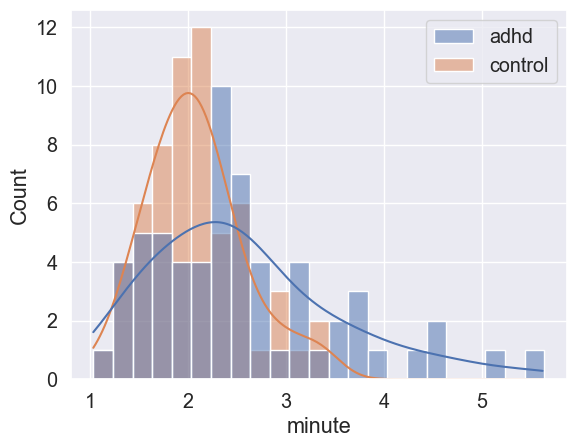

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set(font_scale=1.3) 
tm_cnt=sns.histplot(data=pd.DataFrame([adhd_tm_list,control_tm_list],index=['adhd','control']).T, binwidth=0.2,kde=True)
tm_cnt.set(xticks=np.arange(1,6,1),xlabel='minute')
plt.show()

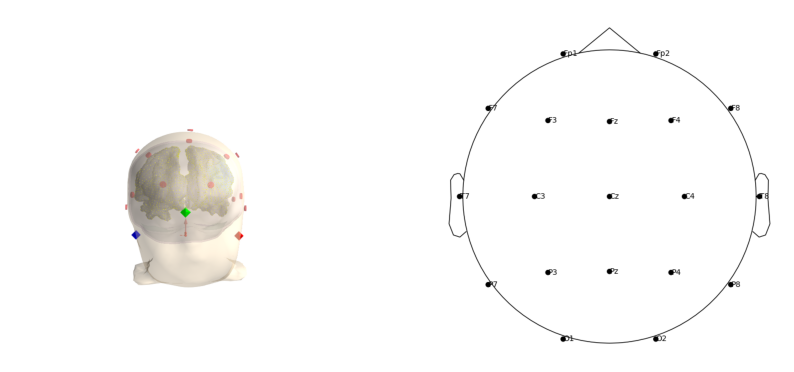

In [16]:
plt.figure(figsize=(10,5))
mri_img=plt.imread('./image/mri.png')
topomap_img=plt.imread('./image/channel_topomap.png')
plt.subplot(1,2,1)
plt.imshow(mri_img)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(topomap_img)
plt.axis('off')
plt.show()

Effective window size : 16.000 (s)
Effective window size : 16.000 (s)


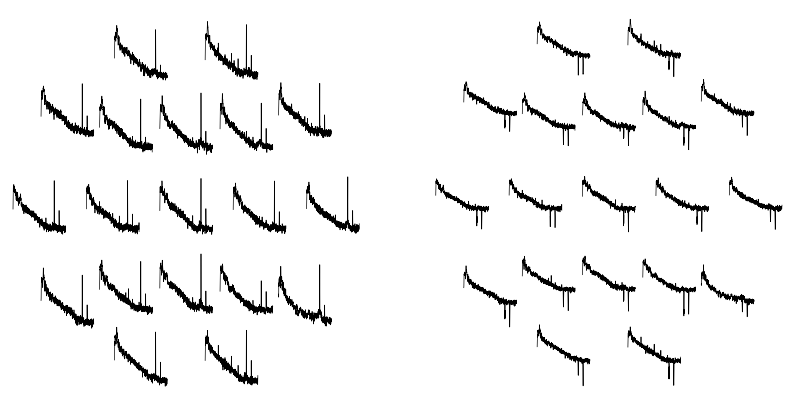

In [156]:
path=f'./dataset/Control_part1'
raw = mne.io.read_raw_eeglab(rf'{path}/Control_1.set', preload=True)
fig = plt.figure(num=None, figsize=(10, 5))
ax1=fig.add_subplot(1,2,1)
raw.plot_psd_topo(show=False,axis_facecolor='w',fig_facecolor='w',color='k',axes=ax1)
ax2=fig.add_subplot(1,2,2)
raw.notch_filter(freqs=[50, 55.8], verbose=False).plot_psd_topo(show=False,axis_facecolor='w',fig_facecolor='w',color='k',axes=ax2)
plt.show()

In [ ]:
import mne
raw=mne.io.read_raw_fif('./Control/Control_1.fif',preload = True,verbose=False)

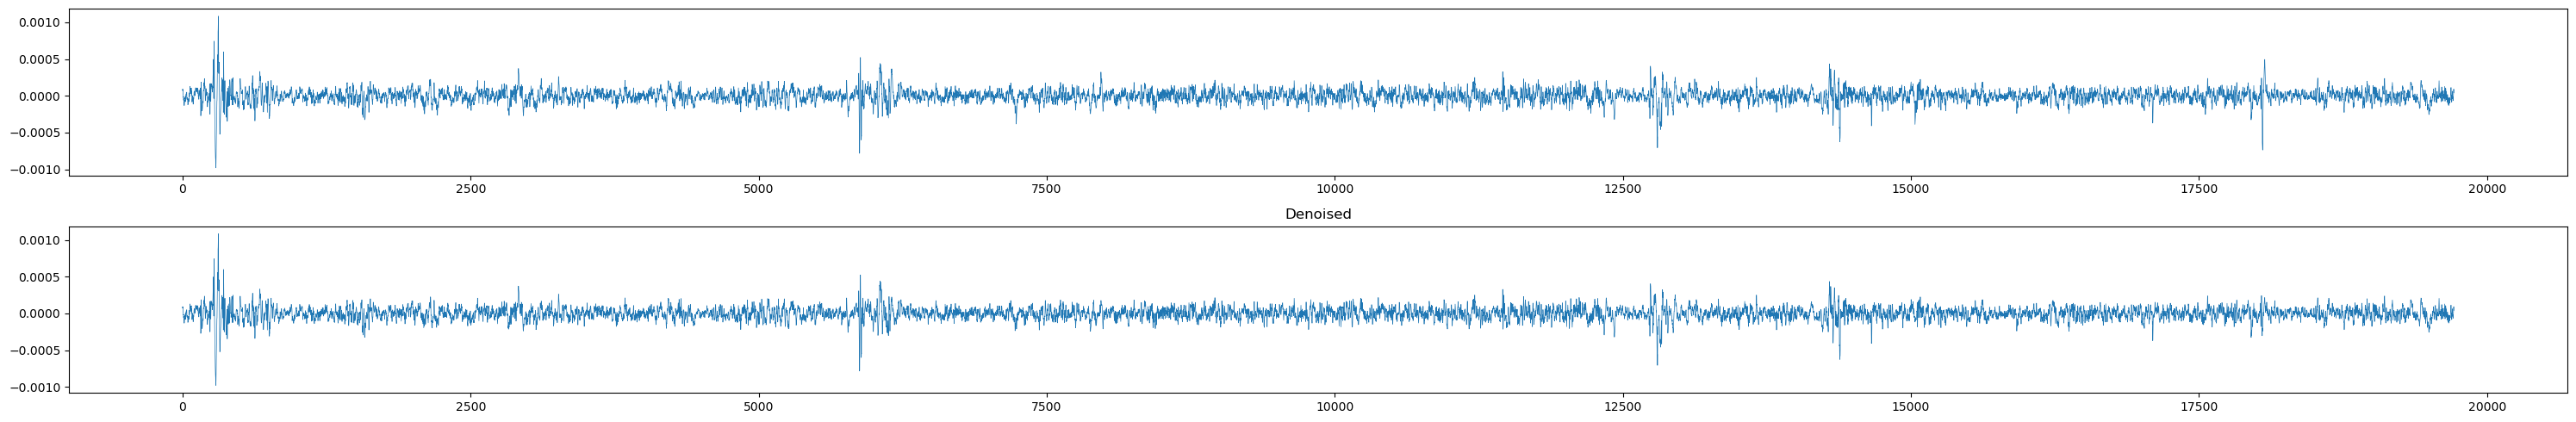

In [121]:
from meegkit import star
x=raw._data.T
y, w, _ = star.star(x, 2,verbose=False)

plt.rcParams["figure.figsize"] = (30,5)
f, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(x[:,1], lw=.5)
ax2.plot(y[:,1], lw=.5)
ax2.set_title('Denoised')
f.set_tight_layout(True)
plt.show()


In [122]:
from mne.preprocessing import annotate_muscle_zscore
threshold_muscle = 5 
annot_muscle, scores_muscle = annotate_muscle_zscore(
    raw, ch_type="eeg", threshold=threshold_muscle, min_length_good=0.2,
    filter_freq=[0, 63],verbose=False)

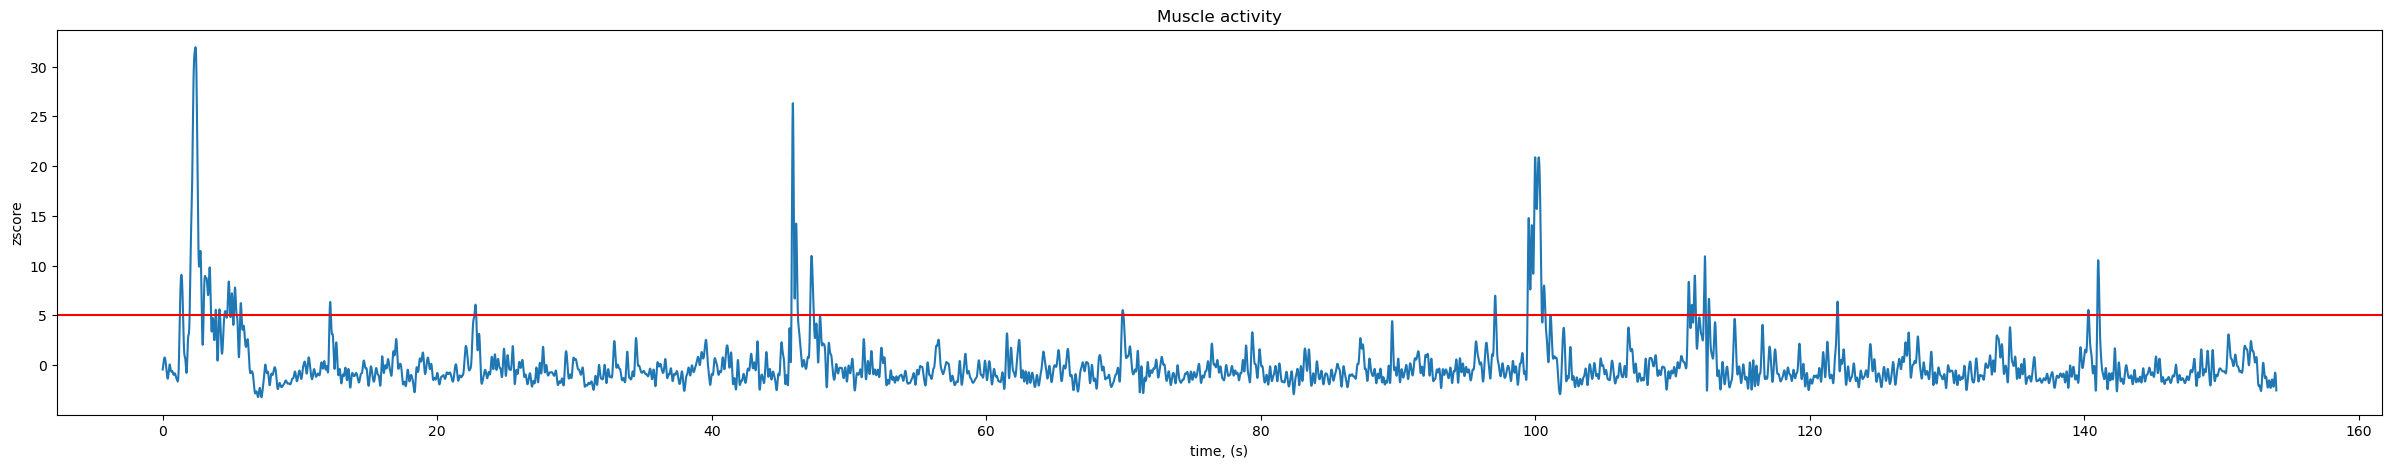

In [123]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(raw.times, scores_muscle)
ax.axhline(y=threshold_muscle, color='r')
ax.set(xlabel='time, (s)', ylabel='zscore', title='Muscle activity')
plt.show()

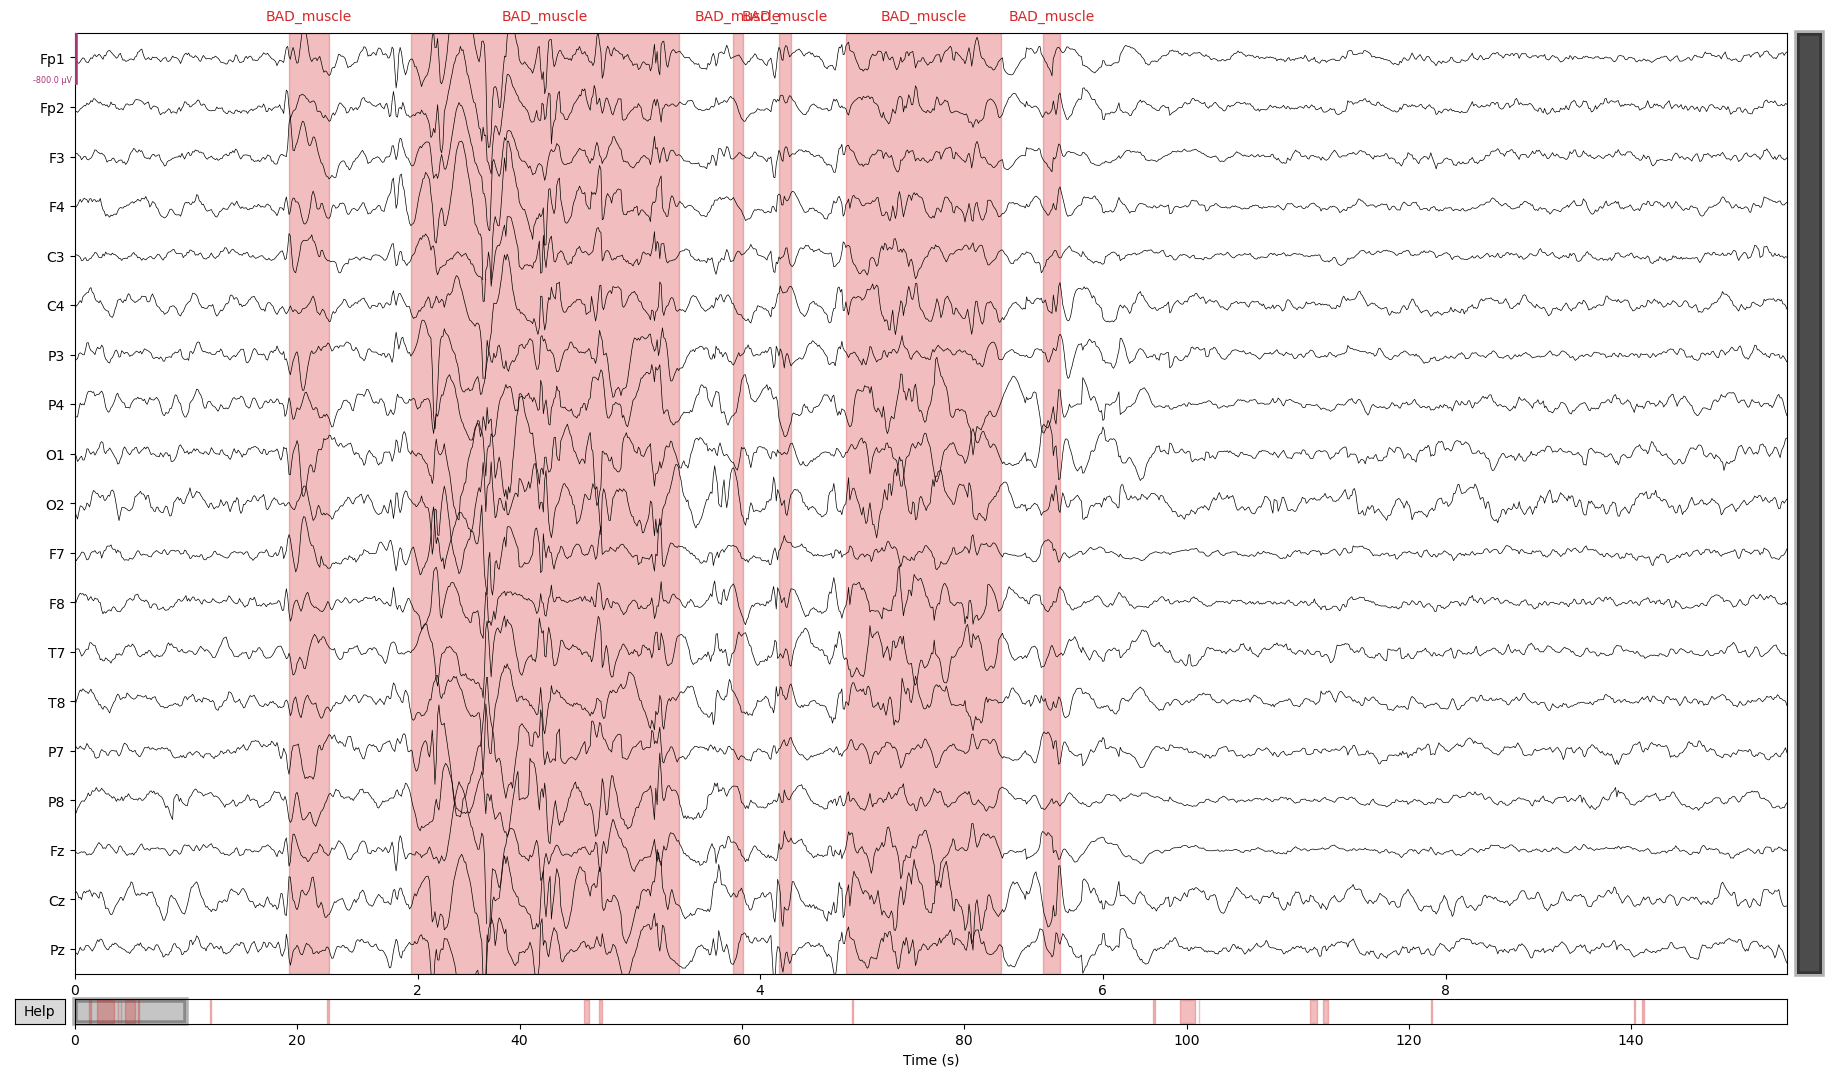

In [131]:
raw.set_annotations(annot_muscle)
raw.plot(scalings={'eeg':-0.0004},show=False)

In [125]:
import os
import numpy as np
import matplotlib.pyplot as plt

from meegkit.asr import ASR
from meegkit.utils.matrix import sliding_window

sfreq=128
# Train on a clean portion of data
asr = ASR(method='euclid')

train_idx = np.arange(0 * sfreq, 30 * sfreq, dtype=int)
_, sample_mask = asr.fit(raw._data[:, train_idx])
# Apply filter using sliding (non-overlapping) windows
X = sliding_window(raw._data, window=int(sfreq), step=int(sfreq))
Y = np.zeros_like(X)

for i in range(X.shape[1]):
    Y[:, i, :] = asr.transform(X[:, i, :])
    
clean = Y.reshape(19, -1)

Creating RawArray with float64 data, n_channels=19, n_times=19712
    Range : 0 ... 19711 =      0.000 ...   153.992 secs
Ready.


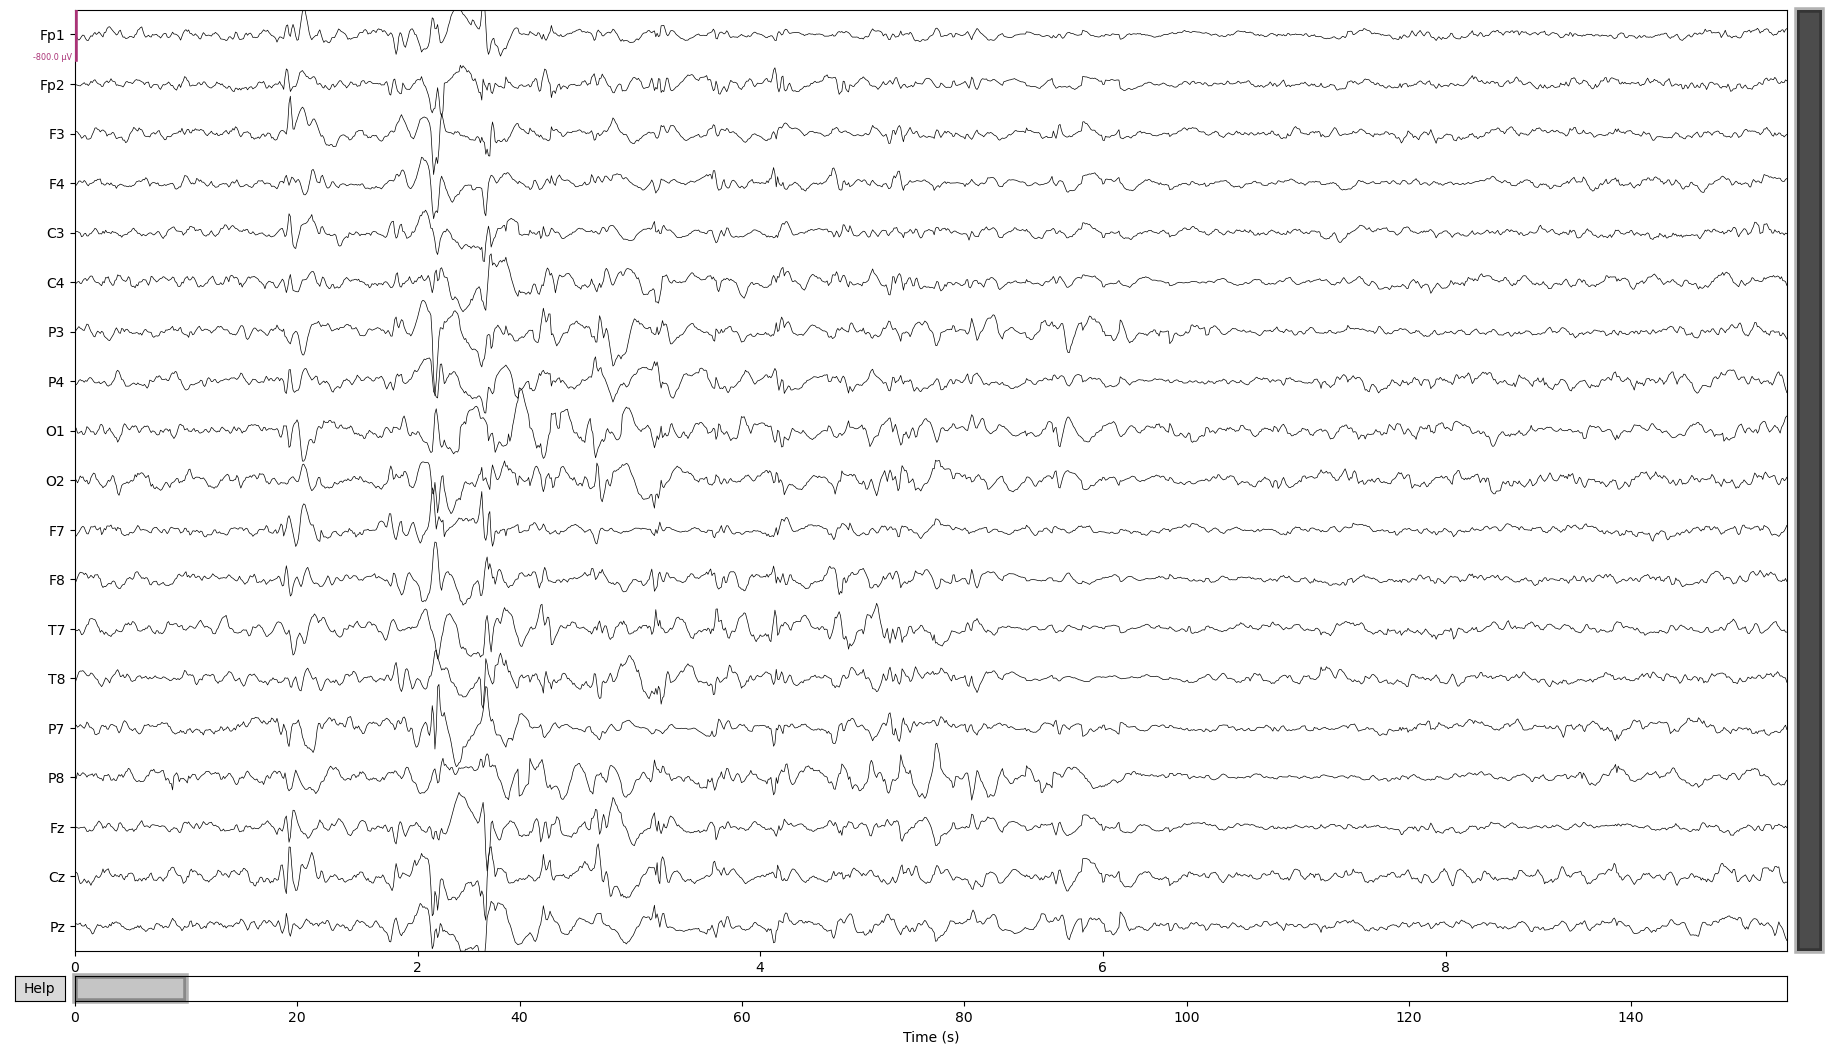

In [132]:
raw2 = mne.io.RawArray(clean,raw.info)
raw2.plot(scalings={'eeg':-0.0004},show=False)

In [196]:
ch_names=['Fp1','Fp2','F3','F4','C3','C4','P3','P4','O1','O2','F7','F8','T7','T8','P7','P8','Fz','Cz','Pz']

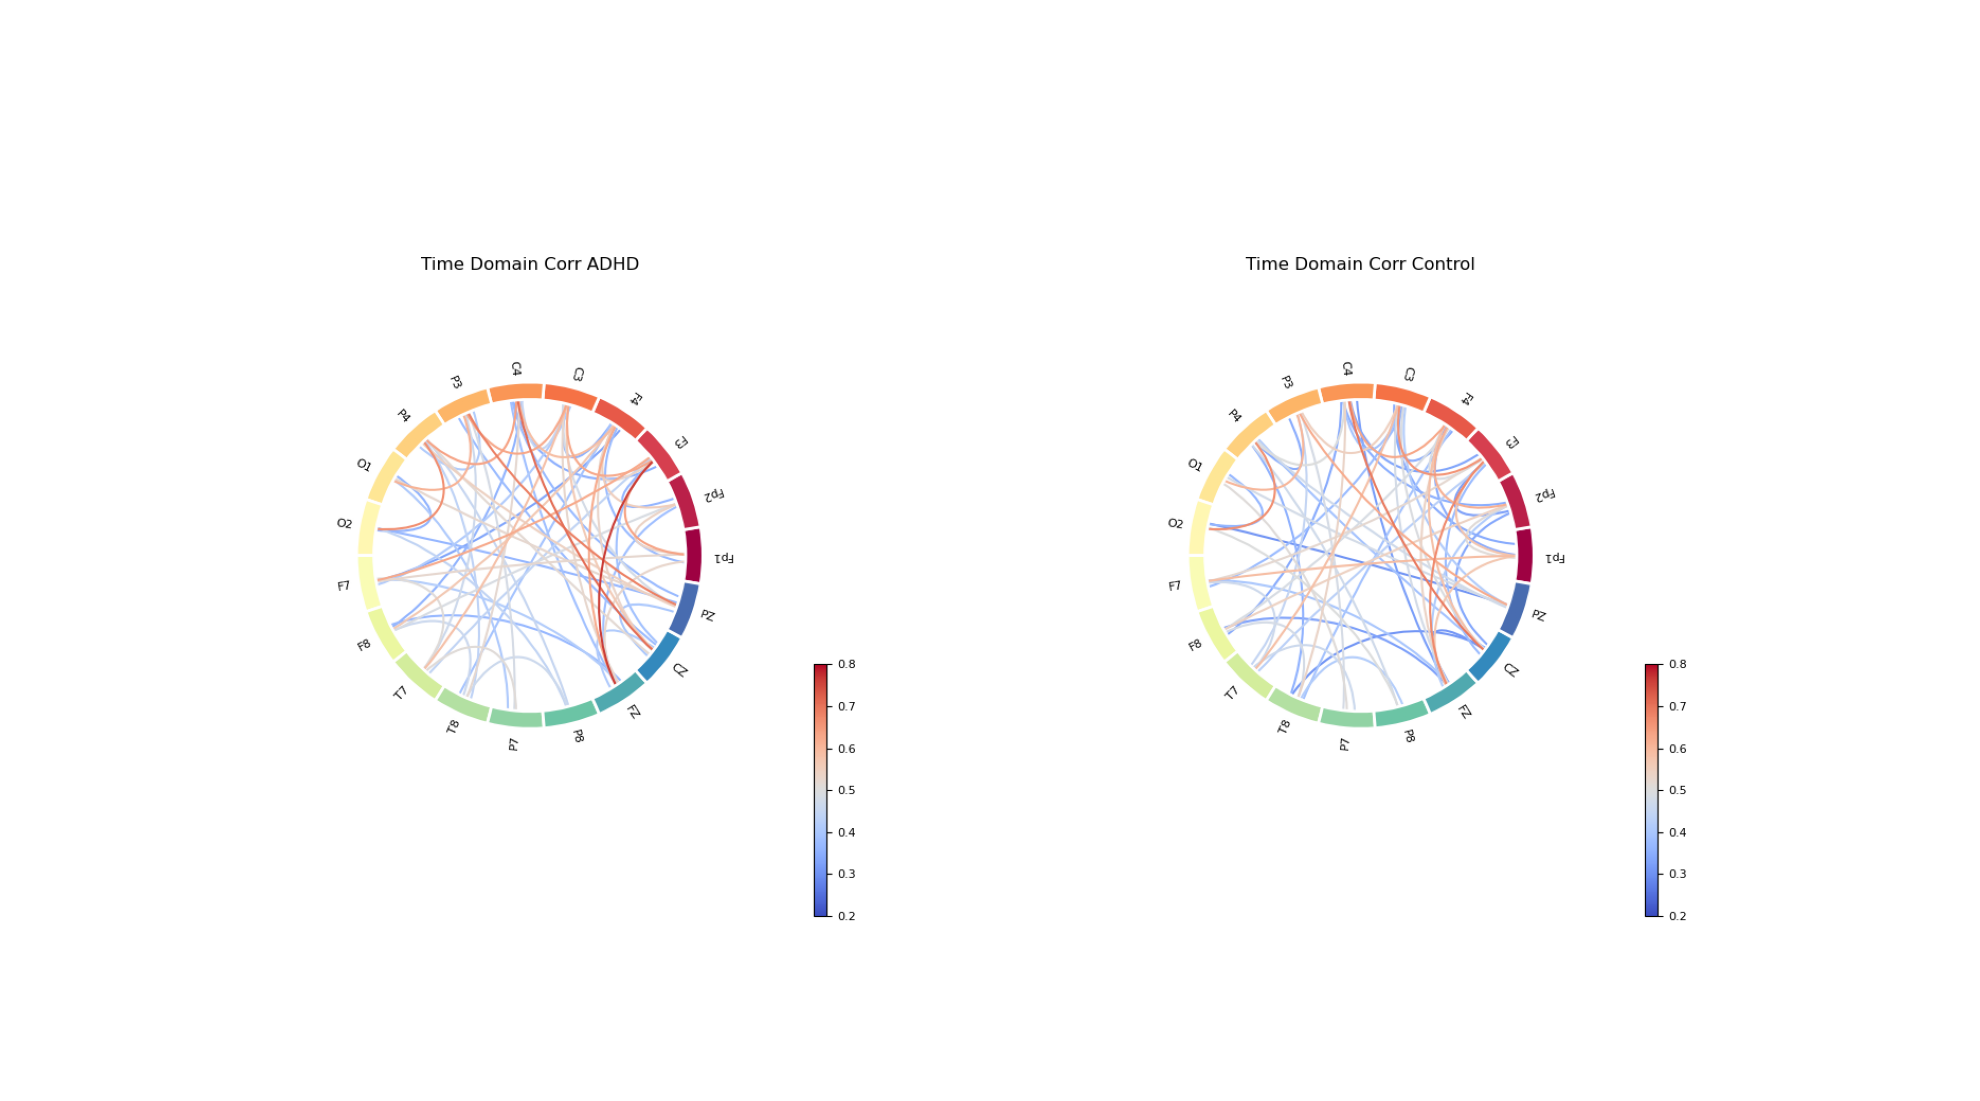

In [154]:
from mne.viz import plot_connectivity_circle
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(40,20))
img=plt.imread('./image/time_corr.png')
plt.axis('off')
plt.imshow(img)


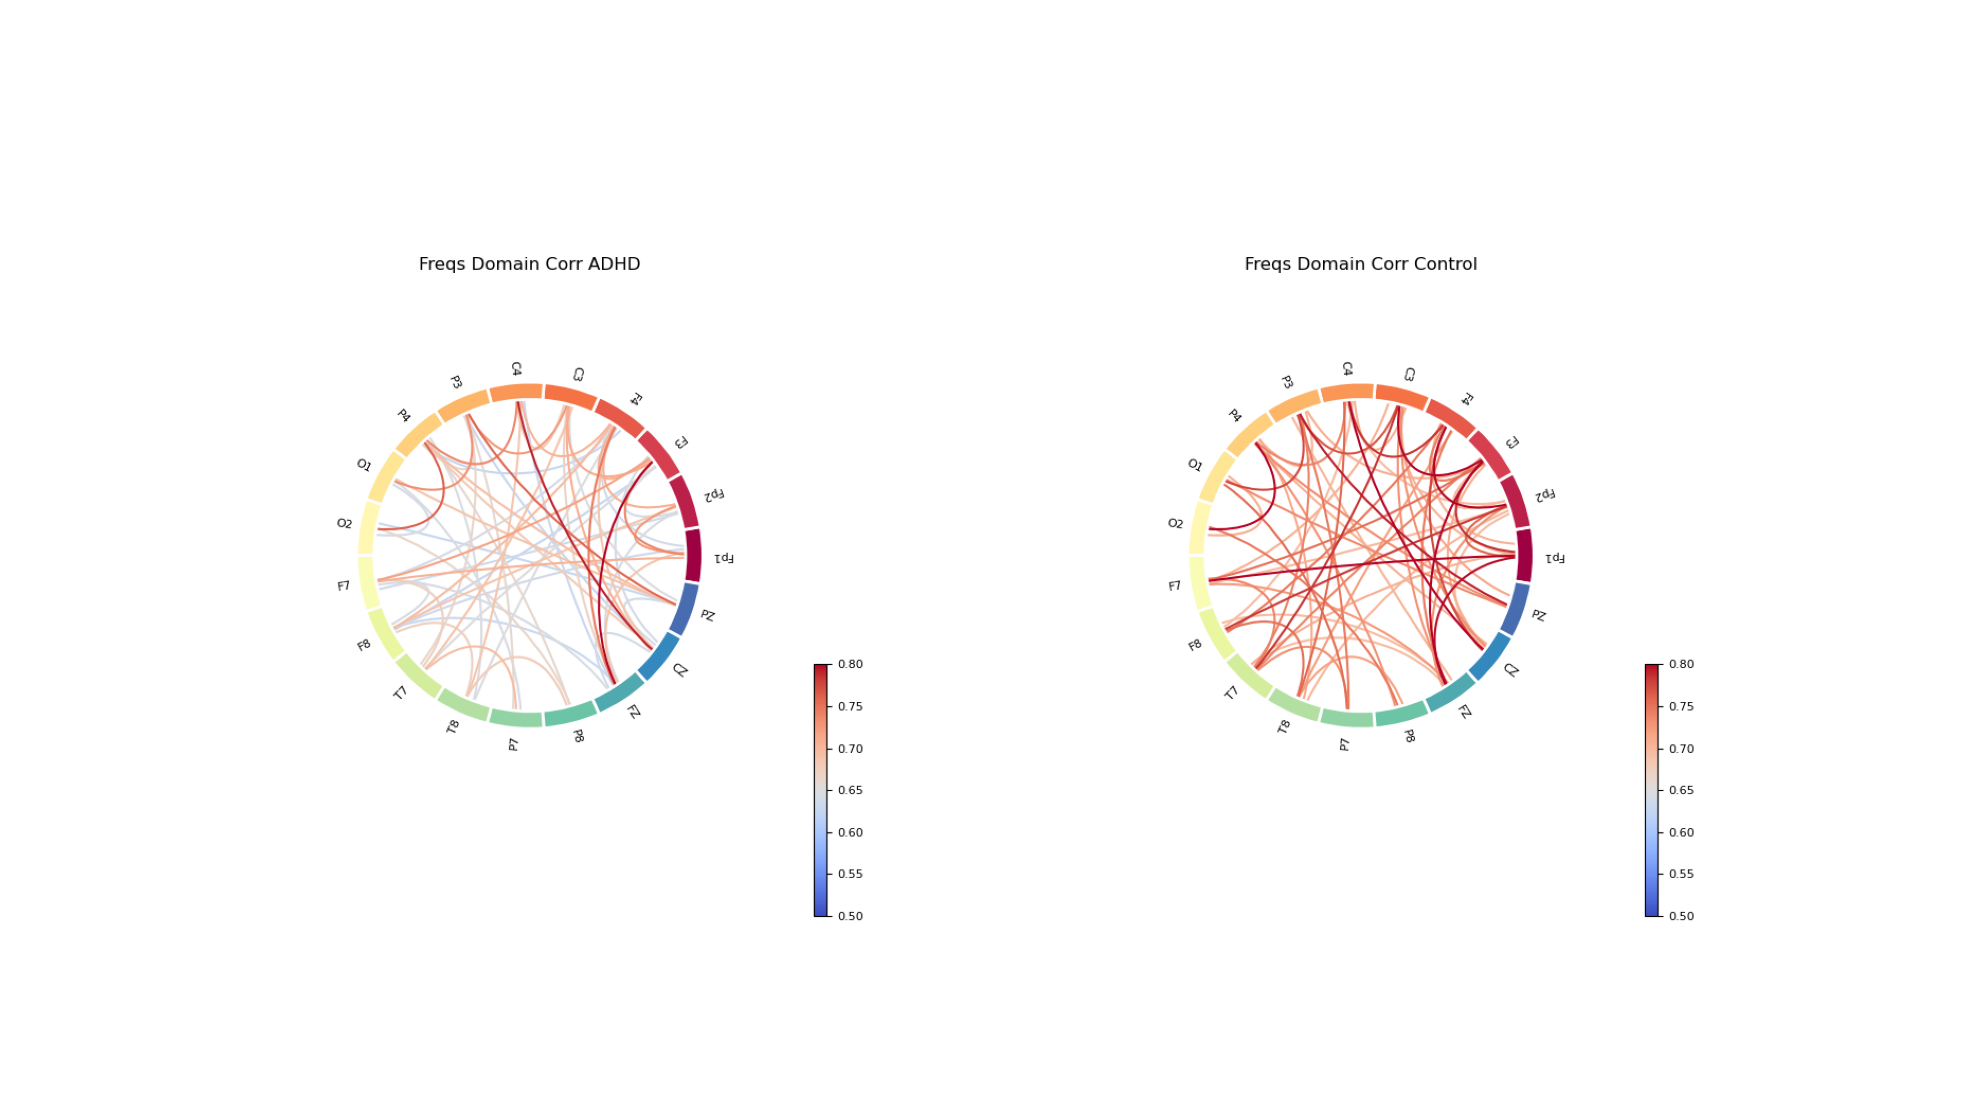

In [153]:
plt.figure(figsize=(40,20))
img=plt.imread('./image/freq_corr.png')
plt.axis('off')
plt.imshow(img)

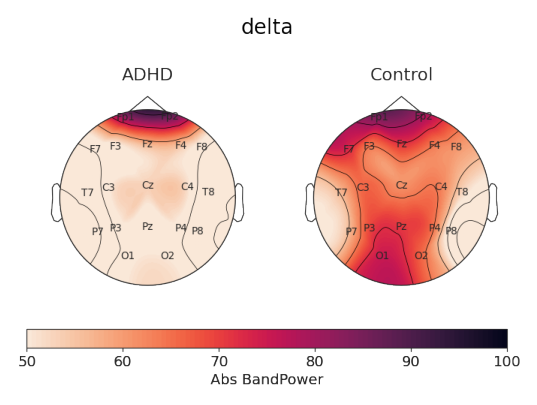

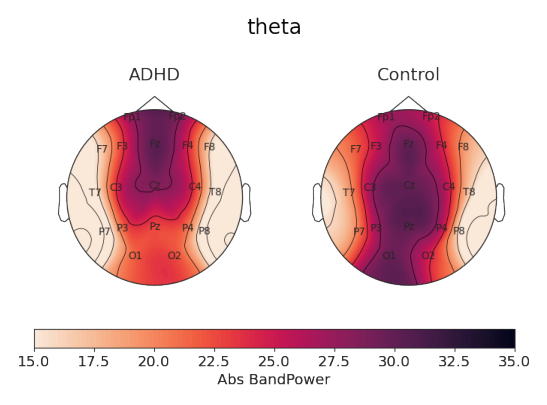

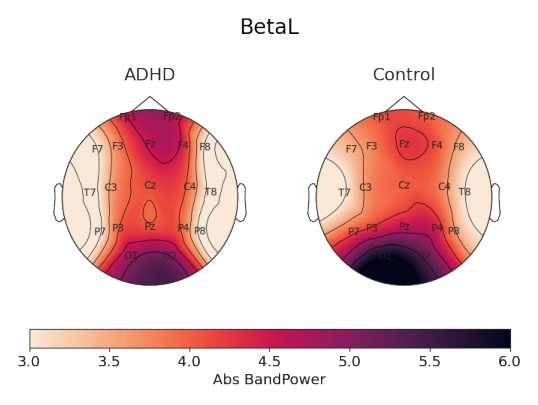

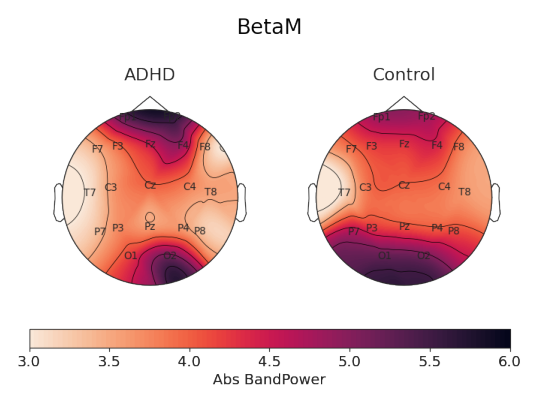

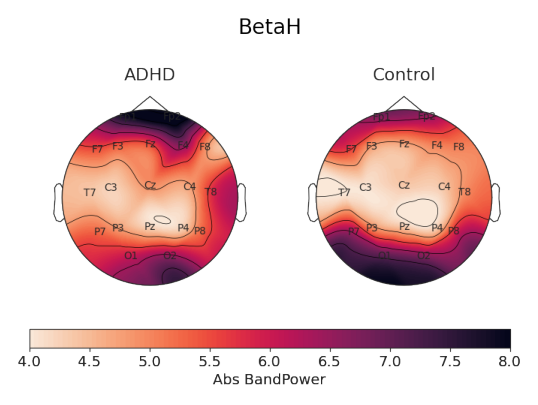

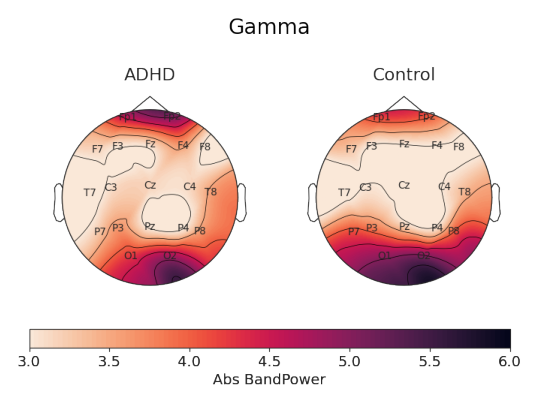

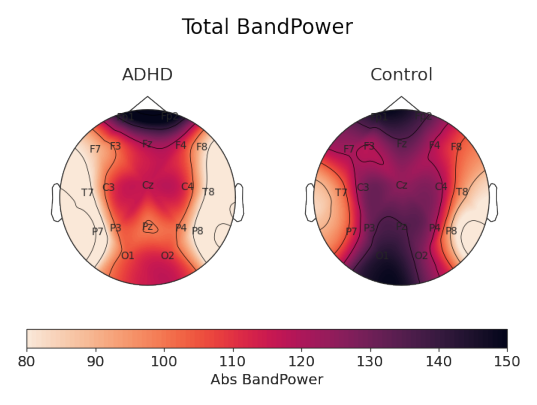

In [14]:
import pandas as pd
import yasa

for i in ['delta','theta','betaL','betaM','betaH','gamma','total']:
    plt.figure(figsize=(10,5))
    img=plt.imread(f'./image/{i}.png')
    plt.axis('off')
    plt.imshow(img)
    plt.show()